# Introducción

## Integrantes


| Nombre                          | Participación | Código     |
|---------------------------------|---------------|------------|
| Rodrigo Gabriel Amaya Mory      | 100%           | 202120725  |
| Lucia Jimena Cartagena Miranda  |              | 2023       |
| Oswaldo Alejandro Quispe Monzón |              | 2023       |
| Sergio Marcelo Ricce Abregú     |            | 2022         |
| Paolo Hurtado                   |             | 20         |


## VARIABLES

| Variable                         | Tipo                   | Descripción                                |
|----------------------------------|------------------------|--------------------------------------------|
| id                               | Cualitativa            | Identificador único                        |
| name                             | Cualitativa            | Nombre de la propiedad                    |
| host_id                          | Cuantitativa Discreta  | Identificador único del anfitrión         |
| host_name                        | Cualitativa            | Nombre del anfitrión                       |
| neighbourhood_group              | Cualitativa            | Grupo de vecindarios                       |
| neighbourhood                    | Cualitativa            | Nombre del vecindario                      |
| latitude                         | Cuantitativa Continua  | Latitud geográfica                         |
| longitude                        | Cuantitativa Continua  | Longitud geográfica                        |
| room_type                        | Cualitativa            | Tipo de habitación                         |
| price                            | Cuantitativa Continua  | Precio del alquiler                        |
| minimum_nights                   | Cuantitativa Discreta  | Número mínimo de noches requeridas        |
| number_of_reviews                | Cuantitativa Discreta  | Número de reseñas                          |
| last_review                      | Cualitativa            | Fecha de la última reseña                 |
| reviews_per_month                | Cuantitativa Continua  | Número de reseñas por mes                 |
| calculated_host_listings_count   | Cuantitativa Discreta  | Cantidad de propiedades que el anfitrión gestiona |
| availability_365                 | Cuantitativa Discreta  | Disponibilidad durante 365 días           |
| number_of_reviews_ltm            | Cuantitativa Discreta  | Número de reseñas a lo largo del tiempo   |


## Contexto

epson stylus

# Métodos

In [39]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Cargar la base de datos en un df
df = pd.read_csv("listings.csv")

## Métodos Gráficos:


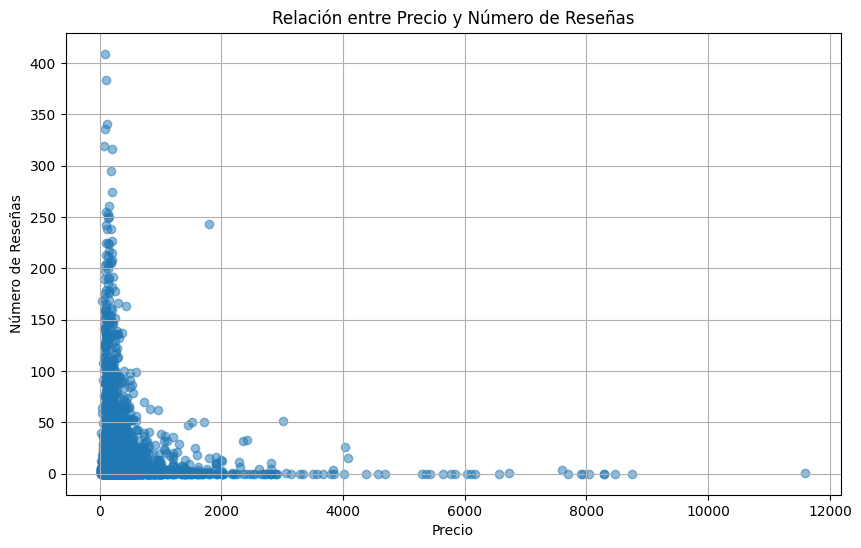

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number_of_reviews'], alpha=0.5)
plt.title('Relación entre Precio y Número de Reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')
plt.grid(True)

# Muestra el gráfico de dispersion
plt.show()

A medida que los precios aumentan, las propiedades tienden a recibir menos reseñas, mientras que las opciones más económicas atraen un mayor número de opiniones de los huéspedes.

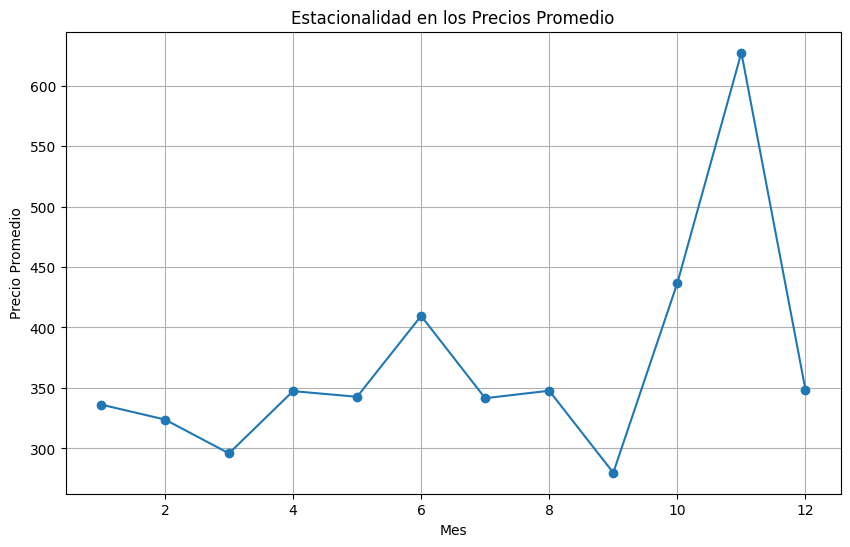

In [42]:
df['last_review'] = pd.to_datetime(df['last_review'])

# Extrae el mes de la fecha de 'last_review'
df['mes'] = df['last_review'].dt.month

# Calcula el precio promedio por mes
precio_promedio_por_mes = df.groupby('mes')['price'].mean()

# Crea un gráfico de línea para mostrar la estacionalidad en los precios
plt.figure(figsize=(10, 6))
plt.plot(precio_promedio_por_mes, marker='o')
plt.title('Estacionalidad en los Precios Promedio')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.grid(True)

# Muestra el gráfico
plt.show()

De acuerdo al gráfico, los precios promedio tienden a ser más bajos en setiembre y alcanzan su punto máximo en noviembre en Belize.

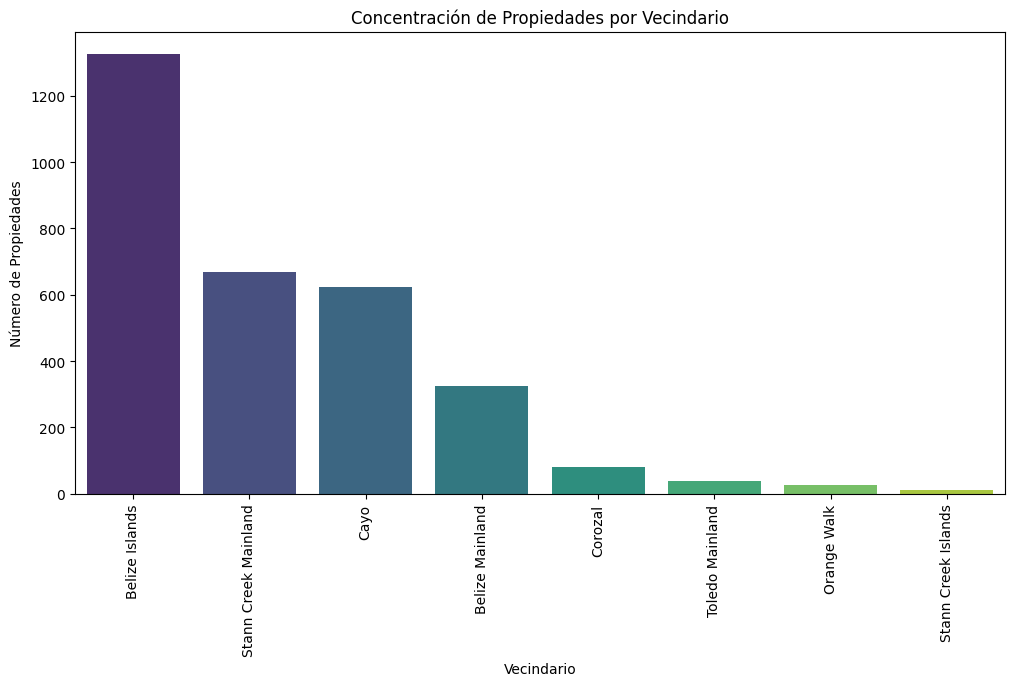

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='neighbourhood', order=df['neighbourhood'].value_counts().index, palette='viridis')
plt.title('Concentración de Propiedades por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=90)
plt.show()

Belize Islands lidera en cantidad de propiedades, mientras que Stann Creek Islands cuenta con la menor cantidad de propiedades en comparación.

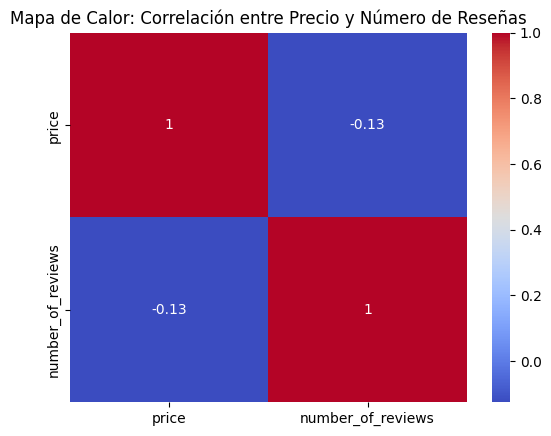

In [44]:
heatmap_data = df[['price', 'number_of_reviews']]
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Personaliza el gráfico
plt.title('Mapa de Calor: Correlación entre Precio y Número de Reseñas')
plt.show()

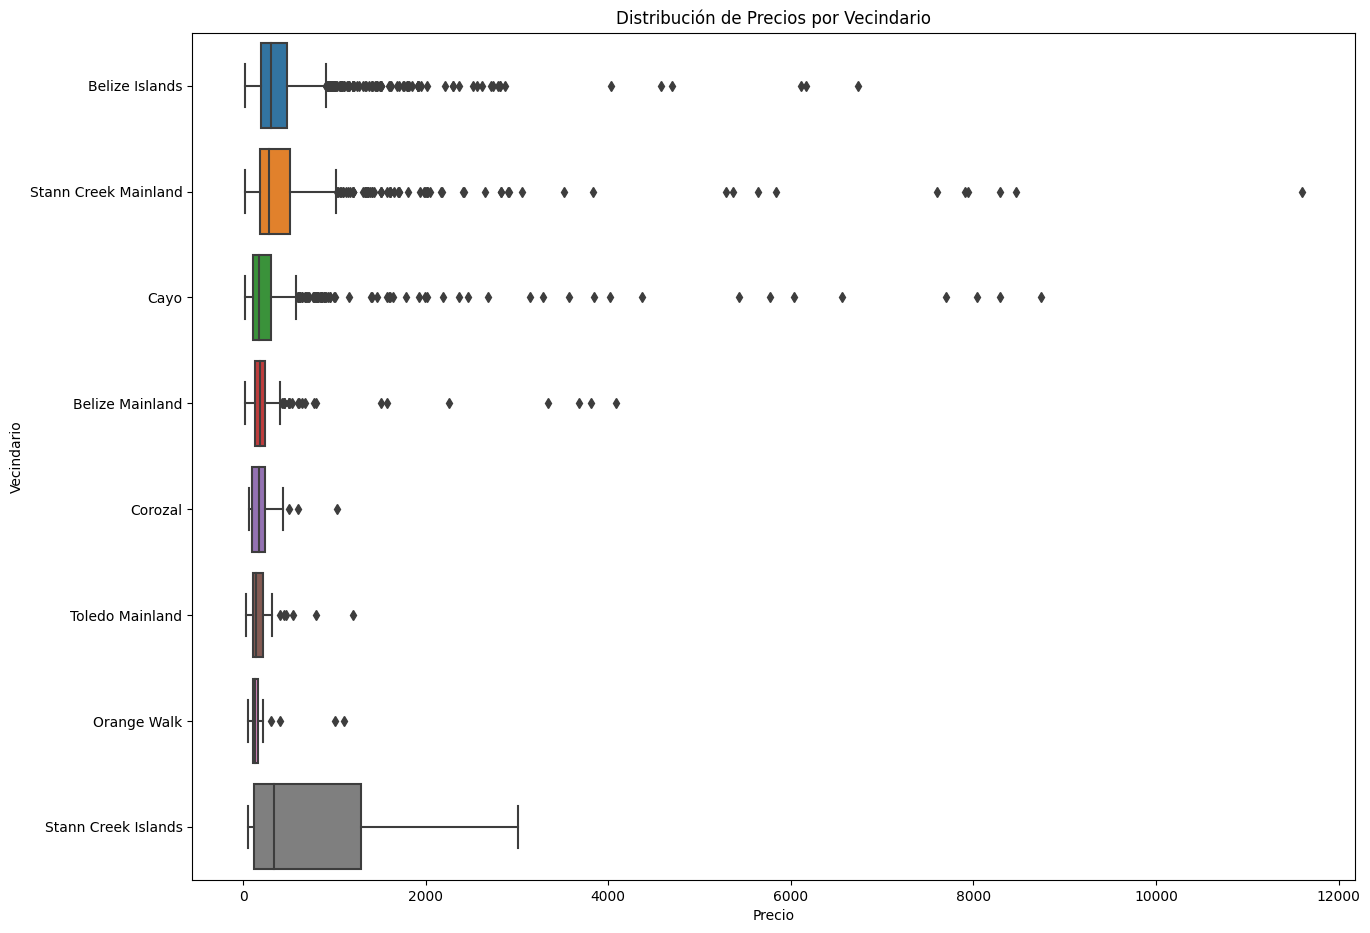

In [45]:
# Crea un gráfico de boxplot para los precios por vecindario
plt.figure(figsize=(15, 11))
sns.boxplot(data=df, x='price', y='neighbourhood', orient='h')
plt.title('Distribución de Precios por Vecindario')
plt.xlabel('Precio')
plt.ylabel('Vecindario')
plt.show()

Se puede observar que en el vecindario Corozal los datos no se encuentran muy dispersos, por otro lado Stann Creek Mainland sus datos están muy dispersos, y tiene la habitación mas cara.

## Métodos no Gráficos

In [46]:
precio_promedio = df['price'].mean()
precio_mediana = df['price'].median()
print(f"Precio Promedio: {precio_promedio}")
print(f"Precio Mediana: {precio_mediana}\n")

# Calcula el precio promedio por tipo de habitación
precio_promedio_por_tipo = df.groupby('room_type')['price'].mean().reset_index()
print(precio_promedio_por_tipo)


Precio Promedio: 423.75870967741935
Precio Mediana: 246.0

         room_type       price
0  Entire home/apt  484.283349
1       Hotel room  238.773109
2     Private room  308.572110
3      Shared room   91.821429


Hay una gran diferencia de precio entre un cuarto compartido y el alquiler de una casa completa.

In [47]:
# Ordena el DataFrame por el número de reseñas en orden descendente
hospedajes_populares = df.sort_values(by='number_of_reviews', ascending=False)

top_10_hospedajes = hospedajes_populares.head(10)
print(top_10_hospedajes[['name', 'number_of_reviews']])

                                                  name  number_of_reviews
0    Tiny home in Caye Caulker · ★4.82 · 1 bed · 1 ...                409
305  Cottage in San Ignacio · ★4.95 · 1 bedroom · 1...                383
462  Rental unit in Belize City · ★4.89 · 1 bedroom...                341
332  Cabin in San Ignacio · ★4.94 · 1 bedroom · 1 b...                336
470  Cabin in San Ignacio · ★4.92 · 2 bedrooms · 2 ...                319
167  Home in Ladyville · ★4.91 · 2 bedrooms · 2 bed...                316
230  Home in Caye Caulker · ★4.92 · 1 bedroom · 1 b...                295
42   Guesthouse in San Pedro · ★4.82 · 1 bedroom · ...                274
40   Rental unit in Caye Caulker · ★4.96 · Studio ·...                261
175  Cabin in Belize District · ★4.80 · 1 bedroom ·...                255


Estamos relacionando la cantidad de reseñas con la popularidad del lugar, en este caso listamos el top 10 de los cuartos con mayores reseñas.

In [48]:
# Agrupa los datos por vecindario y calcula la disponibilidad promedio
disponibilidad_promedio_por_vecindario = df.groupby('neighbourhood')['availability_365'].mean().reset_index()

print(disponibilidad_promedio_por_vecindario)

          neighbourhood  availability_365
0        Belize Islands        264.617647
1       Belize Mainland        261.987692
2                  Cayo        233.477492
3               Corozal        262.375000
4           Orange Walk        277.962963
5   Stann Creek Islands        236.666667
6  Stann Creek Mainland        252.710015
7       Toledo Mainland        174.076923


En este caso el valor entero representa el número de días completos que las propiedades están disponibles para alquilar en promedio durante un año.
Cabe resultar que hay algunas propiedades donde existe una disponibilidades de 365 dias para reservar, y otras que por el contrario tiene 0 dias para hacer reserva.

In [49]:
actividad_anfitriones = df['host_id'].value_counts().reset_index()
actividad_anfitriones.columns = ['Host ID', 'Número de Propiedades']

# Ordena los anfitriones por el número de propiedades en orden descendente
actividad_anfitriones = actividad_anfitriones.sort_values(by='Número de Propiedades', ascending=False)

# Muestra los anfitriones más activos
print(actividad_anfitriones.head(10))

     Host ID  Número de Propiedades
0   76414486                    231
1  261868426                     62
2  151270790                     36
3  496944100                     33
4     604999                     30
5    1120393                     29
6  152891603                     27
7  144130330                     26
8   88200158                     23
9   85339670                     22


In [50]:
# Calcula la correlación entre el precio y el número de reseñas
correlacion = df['price'].corr(df['number_of_reviews'])

# Calcula la covarianza entre el precio y el número de reseñas
covarianza = df['price'].cov(df['number_of_reviews'])

print(f"Correlación: {correlacion}")
print(f"Covarianza: {covarianza}")


Correlación: -0.1257429511419175
Covarianza: -3543.924219467258


Comparación entre dos variables cuantitativas

In [51]:
tabla_cruzada = pd.crosstab(df['room_type'], df['neighbourhood'])

# Muestra la tabla de tabulación cruzada
print(tabla_cruzada)

neighbourhood    Belize Islands  Belize Mainland  Cayo  Corozal  Orange Walk  \
room_type                                                                      
Entire home/apt             990              168   386       53           17   
Hotel room                   46               22    27        1            0   
Private room                282              131   201       26           10   
Shared room                   8                4     8        0            0   

neighbourhood    Stann Creek Islands  Stann Creek Mainland  Toledo Mainland  
room_type                                                                    
Entire home/apt                    2                   476               22  
Hotel room                         0                    23                0  
Private room                      10                   162               17  
Shared room                        0                     8                0  


Aqui estamos comparando 2 variables categóricas, con esta tabla de tabulación cruzada podemos ver que en el vecindario Belize Islandas existe una mayor cantidad del tipo de habitacion casa completa, por otro lado vemos que hay muchos vecindarios con 0 en ciertos tipos de habitación, siendo habitación compartida el que aparece en muy pocos vecindarios.

# Conclusión